In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('tcs_stock.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [3]:
df.shape

(248, 15)

In [4]:
df['Date'].min() , df['Date'].max()

('2015-01-01', '2015-12-31')

In [5]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                  int64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [6]:
# Since 'Date' is object type we first convert it in DateTime 
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [7]:
# Again check types
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                         int64
Deliverable Volume             int64
%Deliverble                  float64
dtype: object

In [8]:
df[['Date','Open']].head()

,Date,Open
0,2015-01-01,2567.0
1,2015-01-02,2551.0
2,2015-01-05,2581.0
3,2015-01-06,2529.1
4,2015-01-07,2470.0


In [9]:
#To check null values
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [10]:
# Seperate 'Open' column from given dataset
df1=df.iloc[:,4:5].values #or df1=df['Open']  df.loc[:,'Open']
#1:2 means start=1 and stop=2-1=1
type(df1)
df1

array([[2567.  ],
       [2551.  ],
       [2581.  ],
       [2529.1 ],
       [2470.  ],
       [2442.4 ],
       [2455.  ],
       [2517.  ],
       [2520.  ],
       [2516.  ],
       [2533.  ],
       [2543.7 ],
       [2536.  ],
       [2520.  ],
       [2522.  ],
       [2516.5 ],
       [2514.  ],
       [2512.35],
       [2503.  ],
       [2538.  ],
       [2560.7 ],
       [2482.  ],
       [2511.65],
       [2568.  ],
       [2520.  ],
       [2553.  ],
       [2561.5 ],
       [2510.  ],
       [2455.05],
       [2479.8 ],
       [2470.  ],
       [2560.  ],
       [2585.05],
       [2636.  ],
       [2698.8 ],
       [2671.  ],
       [2694.  ],
       [2710.  ],
       [2679.  ],
       [2659.45],
       [2677.  ],
       [2679.7 ],
       [2682.  ],
       [2788.  ],
       [2750.  ],
       [2640.  ],
       [2648.9 ],
       [2642.  ],
       [2623.9 ],
       [2638.  ],
       [2585.2 ],
       [2582.5 ],
       [2590.95],
       [2576.  ],
       [2596.  ],
       [26

In [11]:
# Feature Scaling is most important part of Feature Scaling
# Stock Market data Low to High
# Mostly apply Normalization: means MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
#Create object of MinMaxScaler
mms=MinMaxScaler()
df2=mms.fit_transform(df1)

In [13]:
df2

array([[0.52838242],
       [0.49423816],
       [0.55825864],
       [0.4475032 ],
       [0.32138284],
       [0.26248399],
       [0.2893726 ],
       [0.4216816 ],
       [0.42808365],
       [0.41954759],
       [0.45582586],
       [0.47865984],
       [0.46222791],
       [0.42808365],
       [0.43235169],
       [0.4206146 ],
       [0.41527956],
       [0.41175843],
       [0.39180538],
       [0.46649595],
       [0.51493811],
       [0.34699104],
       [0.41026462],
       [0.53051643],
       [0.42808365],
       [0.49850619],
       [0.51664533],
       [0.40674349],
       [0.2894793 ],
       [0.3422962 ],
       [0.32138284],
       [0.5134443 ],
       [0.56690141],
       [0.67562953],
       [0.80964575],
       [0.7503201 ],
       [0.79940248],
       [0.83354673],
       [0.76739223],
       [0.72567222],
       [0.7631242 ],
       [0.76888604],
       [0.77379428],
       [1.        ],
       [0.91890738],
       [0.6841656 ],
       [0.70315834],
       [0.688

In [14]:
# Check no. or rows
len(df2)

248

In [15]:
# Now seperate input and output from one column 'Open'
X_train=df2[0:247]
Y_train=df2[1:248]

In [16]:
len(X_train),len(Y_train)

(247, 247)

In [17]:
# Check Dimension
X_train.ndim

2

In [18]:
# We provide 3D data then we convert our X_train data in 3D
X_train=np.reshape(X_train,(247,1,1))   # t+1=1
# reshape(data,(rows,cols,timestamp))

In [19]:
# To check dimension
X_train.ndim

3

In [20]:
# Part 2
# Building RNN with LSTN
# Recurrent Neural Networks
# LSTM means Long Short Term Memory
from tensorflow.keras.models import Sequential  # initialise neural network
from tensorflow.keras.layers import Dense,Dropout # to add input layer,output layer,
# and hidden layer
from tensorflow.keras.layers import LSTM   # to use built model
# LSTM to manage internal memory, to store previous output

2022-09-03 12:18:04.152265: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 12:18:04.152301: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [21]:
# Create an object of sequential class
model=Sequential()

2022-09-03 12:18:05.586025: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-03 12:18:05.586058: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-03 12:18:05.586080: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (desktop): /proc/driver/nvidia/version does not exist


In [22]:
# To add layers in model
# These layers are input layers and LSTM layers.
model.add(LSTM(units=50,activation='sigmoid',input_shape=(None,1)))
# None means to take no. of rows and 1 means 1 column
# Take Droupouts as we have to consider more neurons
model.add(Dropout(0.1))   # 0.1 means 10%
model.add(Dense(units=1,activation='linear'))    # by default activation='sigmoid'

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
X_train1=X_train[:198]
X_test=X_train[198:]

In [26]:
len(X_train1)

198

In [27]:
Y_train1=Y_train[:198]
Y_test=Y_train[198:]

In [28]:
len(Y_train1),len(Y_test)

(198, 49)

In [29]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
#procedure for callback(EarlyStopping)
cb = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
                  )

In [30]:
# train the model
trained_model=model.fit(X_train1,Y_train1,validation_data=(X_test,Y_test),
                        epochs=2000,callbacks=cb)

Epoch 1/2000
7/7 [==============================] - 1s 40ms/step - loss: 0.0430 - val_loss: 0.1004
Epoch 2/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0431 - val_loss: 0.1211
Epoch 3/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0360 - val_loss: 0.1165
Epoch 4/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0336 - val_loss: 0.0991
Epoch 5/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0354 - val_loss: 0.0986
Epoch 6/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.0995
Epoch 7/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0322 - val_loss: 0.0980
Epoch 8/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0351 - val_loss: 0.0906
Epoch 9/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0359 - val_loss: 0.0910
Epoch 10/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0350 - val_loss: 0.1026
Epoch 11/2000
7/7 

Epoch 84/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.0519
Epoch 85/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0200 - val_loss: 0.0646
Epoch 86/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0240 - val_loss: 0.0563
Epoch 87/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0216 - val_loss: 0.0542
Epoch 88/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.0540
Epoch 89/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0194 - val_loss: 0.0522
Epoch 90/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0216 - val_loss: 0.0487
Epoch 91/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0182 - val_loss: 0.0567
Epoch 92/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0210 - val_loss: 0.0583
Epoch 93/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.0604
Epoch 94/2

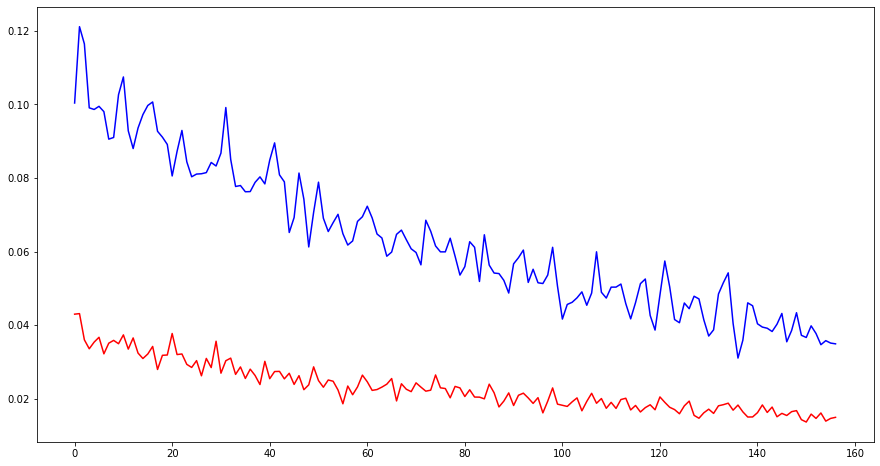

In [31]:
plt.figure(figsize=(15,8))
plt.plot(trained_model.history['loss'],color='red',label='trainig loss')
plt.plot(trained_model.history['val_loss'],color='blue',label='testing loss')
plt.show()

In [32]:
# Testing the model with 20% data
Y_pred=model.predict(Y_test)

2/2 [==============================] - 0s 3ms/step


In [33]:
Y_pred

array([[0.45880887],
       [0.49435768],
       [0.50626004],
       [0.50717515],
       [0.48982224],
       [0.47147995],
       [0.49302933],
       [0.46225324],
       [0.46225324],
       [0.4879434 ],
       [0.50351447],
       [0.49050957],
       [0.45490438],
       [0.4576606 ],
       [0.43739086],
       [0.43927634],
       [0.4052637 ],
       [0.36097214],
       [0.35221082],
       [0.35995767],
       [0.33823794],
       [0.33929855],
       [0.37508032],
       [0.35179576],
       [0.3498129 ],
       [0.32223618],
       [0.3379151 ],
       [0.33597824],
       [0.3499051 ],
       [0.33330354],
       [0.31485865],
       [0.30766627],
       [0.29586554],
       [0.31292218],
       [0.34160438],
       [0.3545165 ],
       [0.31043246],
       [0.35032016],
       [0.35543874],
       [0.3840227 ],
       [0.38863143],
       [0.38858536],
       [0.40705994],
       [0.3840227 ],
       [0.38955316],
       [0.39600417],
       [0.4239567 ],
       [0.419

In [34]:
# To remove scaling on Y_pred, use inverse_transform which are defined
# in MinMaxScaler
Y_pred=mms.inverse_transform(Y_pred)
Y_pred

array([[2534.398 ],
       [2551.0562],
       [2556.6335],
       [2557.0623],
       [2548.9307],
       [2540.3354],
       [2550.4336],
       [2536.012 ],
       [2536.012 ],
       [2548.0503],
       [2555.347 ],
       [2549.253 ],
       [2532.568 ],
       [2533.8596],
       [2524.3613],
       [2525.2449],
       [2509.3066],
       [2488.5515],
       [2484.446 ],
       [2488.0762],
       [2477.8982],
       [2478.3953],
       [2495.1626],
       [2484.2515],
       [2483.3223],
       [2470.4   ],
       [2477.747 ],
       [2476.8394],
       [2483.3655],
       [2475.5862],
       [2466.9429],
       [2463.5725],
       [2458.0427],
       [2466.0354],
       [2479.4758],
       [2485.5266],
       [2464.8687],
       [2483.56  ],
       [2485.9587],
       [2499.353 ],
       [2501.5127],
       [2501.491 ],
       [2510.1482],
       [2499.353 ],
       [2501.9446],
       [2504.9678],
       [2518.0662],
       [2515.7798],
       [2499.677 ]], dtype=float32)

In [35]:
#To remove scaling on Y_test  , use inverse_transform which are define
#in MinMAxScaler class
Y_test1=mms.inverse_transform(Y_test)
Y_test1

array([[2496.25],
       [2535.  ],
       [2548.  ],
       [2549.  ],
       [2530.05],
       [2510.05],
       [2533.55],
       [2500.  ],
       [2500.  ],
       [2528.  ],
       [2545.  ],
       [2530.8 ],
       [2492.  ],
       [2495.  ],
       [2472.95],
       [2475.  ],
       [2438.05],
       [2390.  ],
       [2380.5 ],
       [2388.9 ],
       [2365.35],
       [2366.5 ],
       [2405.3 ],
       [2380.05],
       [2377.9 ],
       [2348.  ],
       [2365.  ],
       [2362.9 ],
       [2378.  ],
       [2360.  ],
       [2340.  ],
       [2332.2 ],
       [2319.4 ],
       [2337.9 ],
       [2369.  ],
       [2383.  ],
       [2335.2 ],
       [2378.45],
       [2384.  ],
       [2415.  ],
       [2420.  ],
       [2419.95],
       [2440.  ],
       [2415.  ],
       [2421.  ],
       [2428.  ],
       [2458.35],
       [2453.05],
       [2415.75]])

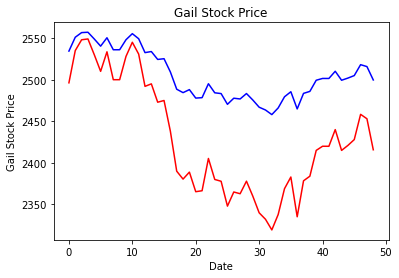

In [36]:
# for compare Actual value Stock Price and Predicted Stock price,
# Use Visualisation
plt.plot(Y_test1,color='red',label='Actual Stock Price')
plt.plot(Y_pred,color='blue',label='Predicterd Stock Price')
plt.title('Gail Stock Price')
plt.xlabel('Date')
plt.ylabel('Gail Stock Price')
plt.show()

In [37]:
# To evaluate the model find r2_score
from sklearn.metrics import r2_score # No need to check r2_score as we are using deep learning
r2_score(Y_test1,Y_pred)

-0.576462521291726

In [38]:
# Predict next dat stock price
n=float(input('Enter Today Opening Stock Price :'))
# here n is scaler variable 
# print(type(n))
# First, convert n into 2D numpy array
n=np.array(n).reshape(-1,1)   # here -1 means None means automatic accept no. or rows but next 1 means no. of column
#print(type(n))
#print(n.ndim)
# Apply scaling : normalisation means MinMaxScaler
n1=mms.transform(n)
#print(n1)
# converts n1 from 2D into 3D array
v=n1.reshape(-1,1,1)
#print(v)
# prediction
pred=model.predict(v)
# print(pred)
# to remove scaling
final=mms.inverse_transform(pred)
print('Opening Price of Next day: ',final)

Enter Today Opening Stock Price :3163
1/1 [==============================] - 0s 141ms/step
Opening Price of Next day:  [[2806.4836]]


In [39]:
# If we want to predict stock price of next 5 day's , then we use for loop

n=float(input('Enter Today Opening Stock Price :'))
# here n is scaler variable 
# print(type(n))
# First, convert n into 2D numpy array
n=np.array(n).reshape(-1,1)
days=int(input("No. of days"))
for i in range(days):
      n=np.array(n).reshape(-1,1)   # here -1 means None means automatic accept no. or rows but next 1 means no. of column
      # Apply scaling : normalisation means MinMaxScaler
      n1=mms.transform(n)
      # converts n1 from 2D into 3D array
      v=n1.reshape(-1,1,1)
      # prediction
      pred=model.predict(v)
      # to remove scaling
      final=mms.inverse_transform(pred)
      print('Opening Price of Next day: ',final)
      n=final

Enter Today Opening Stock Price :3163
No. of days5
1/1 [==============================] - 0s 17ms/step
Opening Price of Next day:  [[2806.4836]]
1/1 [==============================] - 0s 17ms/step
Opening Price of Next day:  [[2665.6782]]
1/1 [==============================] - 0s 16ms/step
Opening Price of Next day:  [[2606.783]]
1/1 [==============================] - 0s 17ms/step
Opening Price of Next day:  [[2581.7688]]
1/1 [==============================] - 0s 17ms/step
Opening Price of Next day:  [[2571.0908]]
